Import packages

In [1]:
#
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Run next cell to generate 3D synthetic data

In [2]:
#
np.random.seed(4)
m = 600
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

Visualize data by 3D scatter plot

Text(0.5,0,'$X_3$')

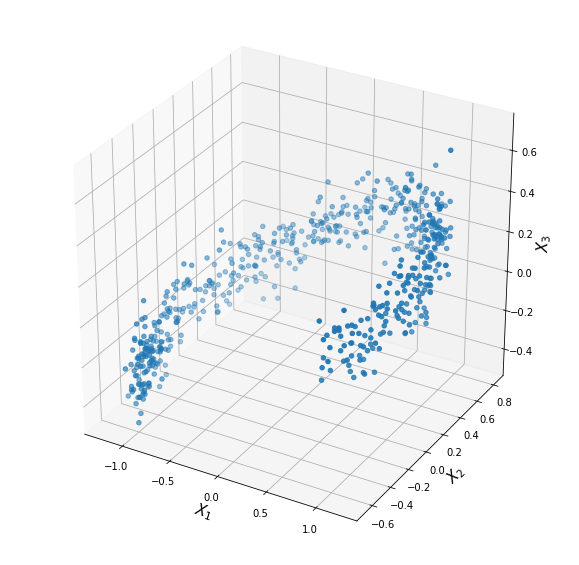

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)

Use SVD to reduce X to 2 dimensions. Then visualize the reduced data by  a scatter plot.

In [4]:
from numpy.linalg import svd

In [5]:
mean_X = np.mean(X, axis=0)

In [6]:
X_demeaned = X - mean_X

In [7]:
U, S, VT = svd(X_demeaned)

In [8]:
W = VT.T[:, :2]

In [9]:
Z = X_demeaned.dot(W)

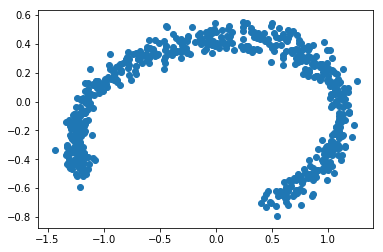

In [10]:
plt.scatter(Z[:, 0], Z[:, 1])

Recover the raw data from the reduced data.

In [11]:
X_recoverd = Z.dot(W.T) + mean_X

Visualize raw data and the recovered data in one 3D plot

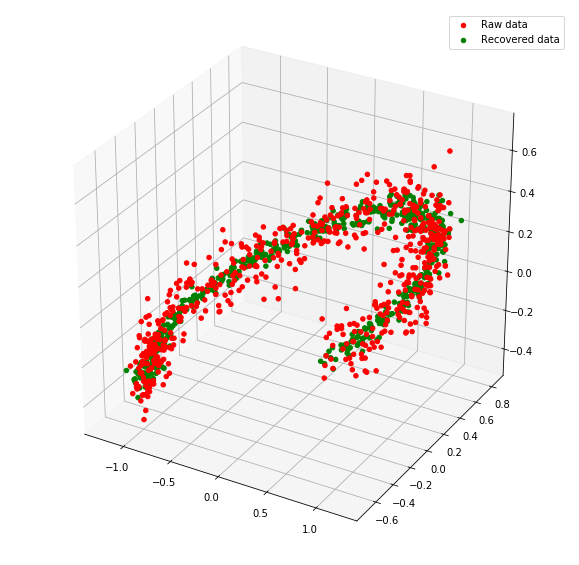

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], alpha=1, color='red', label='Raw data')
ax.scatter3D(X_recoverd[:, 0], X_recoverd[:, 1], X_recoverd[:, 2], alpha=1, color='green', label='Recovered data')
ax.legend()

Use sklearn to X to 2 dimensions. Then visualize the result.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
Z = pca.transform(X)

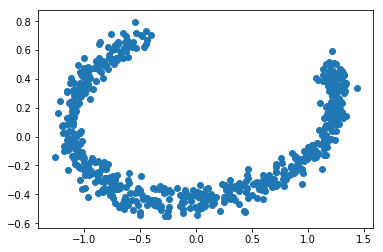

In [16]:
plt.scatter(Z[:, 0], Z[:, 1])

Recover raw data from the reduced data.

In [17]:
X_recoverd = pca.inverse_transform(Z)

Print out the expalined variance by the first two principal components.

In [18]:
pca.explained_variance_ratio_

array([0.85813857, 0.13328495])

# PCA for compression

Load mnist training data and return as X, y

In [19]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [20]:
X, y = mnist.data, mnist.target

Use sklearn PCA to reduce the dimension of X. Keep >95% variance.

In [21]:
pca = PCA(n_components=0.95)

In [22]:
Z = pca.fit_transform(X)

Use the reduced data to recover X. Then visualzie a raw image and a corresponding recoved image.

In [23]:
X_recovered = pca.inverse_transform(Z)

Text(0.5,1,'Recovered image')

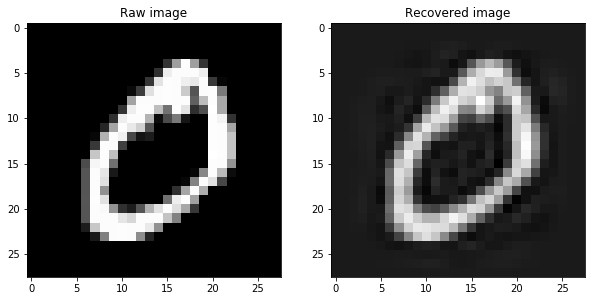

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].imshow(X[0, :].reshape((28, -1)), cmap=plt.cm.gray)
ax[0].set_title('Raw image')
ax[1].imshow(X_recovered[0, :].reshape((28, -1)), cmap=plt.cm.gray)
ax[1].set_title('Recovered image')